<a href="https://colab.research.google.com/github/arehvs/practice/blob/main/SachinvsKohli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import  drive
drive.mount('/content/drive/')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# To display all row and column
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame.repr', False)
pd.set_option('max_colwidth',-1)

Mounted at /content/drive/


In [3]:
!pip install -1 keras


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -1


In [4]:
import keras

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV_files/ODI_data.csv')
# fileList = drive.mount("/drive", force_remount=True)
# fileList = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()


In [6]:
df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Length of whole df
len(df)

171968

In [8]:
# length of columns
len(df.columns)

28

In [9]:
  # Criteria
  # Runs Per Inning
  # Strike rate
  # 100s
  # 50s
  # Team contribution 

In [10]:
# Unique Runs scored
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '-', nan, '40', '6', '4', '87', '54', '46',
       '30', '12', '69', '39', '14', '10', '9', '8', '7', '82', '52',
       '41', '15', '98', '43', '19', '111', '48', '36', '25', '67', '60',
       '84', '59', '55', '47', '85', '49', '45', '34', '29', '22', '74',
       '28', '77', '50', '32', '23', '35', '122', '100', '95', '103',
       '113', '53', '96', '27', '64', '58', '33', '31', '73', '56', '86',
       '62', '106', '24', '57', '104', '26', '66', '51', '118', '105',
       '101', '21', '79', '44', '102', '88', '80', '72', '97', '68', '89',
       '38', '83', '63', '148', '166', '90', '76', '37', '70', '124',
       '94', '140', '153', '107', '117', '121', '92', '78', '75', '114',
       '115', '130', '128', '151', '110', '138', '135', '109', '61',
       '179', '170', '112', '116', '91', '143', '93', '123', '145', '81',
       '150', '162', '108', '131', '133', '137', '146', '139', 

In [11]:
# Removing '-' from the data set
df = df[df['Innings Runs Scored Num'] != '-']

In [12]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', nan, '40', '6', '4', '87', '54', '46', '30',
       '12', '69', '39', '14', '10', '9', '8', '7', '82', '52', '41',
       '15', '98', '43', '19', '111', '48', '36', '25', '67', '60', '84',
       '59', '55', '47', '85', '49', '45', '34', '29', '22', '74', '28',
       '77', '50', '32', '23', '35', '122', '100', '95', '103', '113',
       '53', '96', '27', '64', '58', '33', '31', '73', '56', '86', '62',
       '106', '24', '57', '104', '26', '66', '51', '118', '105', '101',
       '21', '79', '44', '102', '88', '80', '72', '97', '68', '89', '38',
       '83', '63', '148', '166', '90', '76', '37', '70', '124', '94',
       '140', '153', '107', '117', '121', '92', '78', '75', '114', '115',
       '130', '128', '151', '110', '138', '135', '109', '61', '179',
       '170', '112', '116', '91', '143', '93', '123', '145', '81', '150',
       '162', '108', '131', '133', '137', '146', '139', '125'

In [13]:
# Removing 'nan'
df = df.dropna(subset = ['Innings Runs Scored Num'])

In [14]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '40', '6', '4', '87', '54', '46', '30', '12',
       '69', '39', '14', '10', '9', '8', '7', '82', '52', '41', '15',
       '98', '43', '19', '111', '48', '36', '25', '67', '60', '84', '59',
       '55', '47', '85', '49', '45', '34', '29', '22', '74', '28', '77',
       '50', '32', '23', '35', '122', '100', '95', '103', '113', '53',
       '96', '27', '64', '58', '33', '31', '73', '56', '86', '62', '106',
       '24', '57', '104', '26', '66', '51', '118', '105', '101', '21',
       '79', '44', '102', '88', '80', '72', '97', '68', '89', '38', '83',
       '63', '148', '166', '90', '76', '37', '70', '124', '94', '140',
       '153', '107', '117', '121', '92', '78', '75', '114', '115', '130',
       '128', '151', '110', '138', '135', '109', '61', '179', '170',
       '112', '116', '91', '143', '93', '123', '145', '81', '150', '162',
       '108', '131', '133', '137', '146', '139', '125', '12

In [15]:
# convert into a datetime
df['Innings Date'] = pd.to_datetime(df['Innings Date'])

In [16]:
df['year'] = df['Innings Date'].dt.year
# creating new column for year from the Innings Date

In [17]:
df.tail(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
171941,RW Marsh,10*,10,24,1.0,1.0,18,2,0,55.55,2,v England,Melbourne,1971-05-01,Australia,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971


In [18]:
# Sachin 1994-2004
# Virat 2009-2019

In [19]:
df['Innings Runs Scored Num'] = df['Innings Runs Scored Num'].astype(int)
df['Innings Balls Faced'] = df['Innings Balls Faced'].astype(int)
df['Innings Not Out Flag'] = df['Innings Not Out Flag'].astype(int)
# Change into IntegerType

In [20]:
# Sachin DF
sachin_df = df[(df.year >= 1994) & (df.year <= 2004 )]

# virat Df
virat_df = df[(df.year >= 2009) & (df.year <= 2019)]

In [21]:
sachin_df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77610,V Sehwag,70,70,85,1.0,0,52,9,2,134.61,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77611,Yuvraj Singh,69,69,34,1.0,0,32,8,3,215.62,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [22]:
virat_df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [23]:
# Runs per innings = Total Runs / Total innings
# Strikerate = 100* (Total Runs / Total balls)
# 100's = sum(100's)
# 50's = sum(50's)
# Team contribution = Players Runs / Team Runs

In [24]:
# Get type of each column
df.dtypes

Innings Player                   object        
Innings Runs Scored              object        
Innings Runs Scored Num          int64         
Innings Minutes Batted           object        
Innings Batted Flag              float64       
Innings Not Out Flag             int64         
Innings Balls Faced              int64         
Innings Boundary Fours           object        
Innings Boundary Sixes           object        
Innings Batting Strike Rate      object        
Innings Number                   object        
Opposition                       object        
Ground                           object        
Innings Date                     datetime64[ns]
Country                          object        
50's                             float64       
100's                            float64       
Innings Runs Scored Buckets      object        
Innings Overs Bowled             object        
Innings Bowled Flag              float64       
Innings Maidens Bowled           object 

In [25]:
# convert into csv
sachin_df.to_csv('sachin_data.csv')

In [26]:
# What is the total runs scored by Sachin in the frame
sachin_df.head(20)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77610,V Sehwag,70,70,85,1.0,0,52,9,2,134.61,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77611,Yuvraj Singh,69,69,34,1.0,0,32,8,3,215.62,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77612,R Dravid,60,60,87,1.0,0,68,5,0,88.23,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77613,SC Ganguly,55,55,98,1.0,0,80,2,2,68.75,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77615,M Kaif,29*,29,52,1.0,1,24,2,0,120.83,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77616,MS Dhoni,7*,7,2,1.0,1,2,0,1,350,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77621,Rajin Saleh,82,82,149,1.0,0,114,8,1,71.92,2,v India,Dhaka,2004-12-27,Bangladesh,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77622,Mashrafe Mortaza,39,39,12,1.0,0,20,3,3,195,2,v India,Dhaka,2004-12-27,Bangladesh,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77623,Mohammad Ashraful,32,32,52,1.0,0,34,4,0,94.11,2,v India,Dhaka,2004-12-27,Bangladesh,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [27]:
# Filtering by Innings Player Name to get Sachin's data from sachin_df

# SR Tendulkar
sdf = sachin_df[sachin_df['Innings Player'] == 'SR Tendulkar']

In [28]:
# Filtering by Innings Player Name to get Kohli's data from virat_df
kdf = virat_df[virat_df['Innings Player'] == 'V Kohli'	]

In [29]:
sdf.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77747,SR Tendulkar,19,19,46,1.0,0,32,3,0,59.37,1,v Bangladesh,Chattogram,2004-12-23,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
78054,SR Tendulkar,16,16,30,1.0,0,17,2,0,94.11,1,v Pakistan,Kolkata,2004-11-13,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
79590,SR Tendulkar,74,74,170,1.0,0,100,7,1,74,2,v Sri Lanka,Colombo (RPS),2004-01-08,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
79681,SR Tendulkar,18,18,30,1.0,0,21,3,0,85.71,1,v Sri Lanka,Colombo (RPS),2004-07-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [30]:
virat_df.head(20)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,SO Hetmyer,18,18,31,1.0,0,20,2,0,90,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,RL Chase,18,18,34,1.0,0,23,0,0,78.26,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,SS Cottrell,17,17,23,1.0,0,18,2,1,94.44,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
5,JO Holder,13*,13,38,1.0,1,19,0,0,68.42,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
6,CH Gayle,11,11,49,1.0,0,24,1,0,45.83,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
7,SD Hope,5,5,14,1.0,0,10,0,0,50,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
8,CR Brathwaite,0,0,5,1.0,0,3,0,0,0,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
9,KAJ Roach,0,0,5,1.0,0,3,0,0,0,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [31]:
kdf.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
11,V Kohli,120,120,179,1.0,0,125,14,1,96,1,v West Indies,Port of Spain,2019-11-08,India,0.0,1.0,100-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
327,V Kohli,1,1,8,1.0,0,6,0,0,16.66,2,v New Zealand,Manchester,2019-09-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
420,V Kohli,34*,34,61,1.0,1,41,3,0,82.92,2,v Sri Lanka,Leeds,2019-06-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
664,V Kohli,26,26,45,1.0,0,27,3,0,96.29,1,v Bangladesh,Birmingham,2019-02-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
804,V Kohli,66,66,103,1.0,0,76,7,0,86.84,2,v England,Birmingham,2019-06-30,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [32]:
# Sum of Innings Runs Scored Num by SR Tendulkar

sum(sdf['Innings Runs Scored Num'])

11818

In [33]:
# Sum of Innings Runs Scored Num by V Kohli
sum(kdf['Innings Runs Scored Num'])

11247

In [34]:
# Total number of balls faced by Sachin
sum(sdf['Innings Balls Faced'])

13397

In [35]:
# Total number of balls faced by Kohli
sum(kdf['Innings Balls Faced'])

12021

In [36]:
# Runs per innings = Total Runs / Total innings

In [37]:

# Sachin's RPI

total_runs_sachin = sum(sdf['Innings Runs Scored Num'])
total_innings_sachin = len(sdf)
sachin_RPI = (total_runs_sachin/total_innings_sachin)
sachin_RPI

43.608856088560884

In [38]:
# kohli's RPI

total_runs_kohli = sum(kdf['Innings Runs Scored Num'])
total_innings_kohli = len(kdf)
kohli_RPI = (total_runs_kohli/total_innings_kohli)
kohli_RPI

50.20982142857143

In [39]:
# Strikerate = 100* (Total Runs / Total balls)

In [40]:
# Sachin's strikerate
sachin_sr = 100*(total_runs_sachin/sum(sdf['Innings Balls Faced']))
sachin_sr

88.21377920429947

In [41]:
# Virat's strikerate
virat_sr = 100*(total_runs_kohli/sum(kdf['Innings Balls Faced']))
virat_sr

93.56126778138258

In [42]:
# 100's

virat_hund = sum(kdf["100's"])
sachin_hund = sum(sdf["100's"])
print('(',virat_hund,',',sachin_hund,')')

( 42.0 , 37.0 )


In [43]:
# 50's
sum(kdf["50's"]),sum(sdf["50's"])

(53.0, 57.0)

In [44]:
# Team contribution = Players Runs , Team Runs

# Runs scored by each player - Virat and Sachin
sum(kdf['Innings Runs Scored Num']),sum(sdf['Innings Runs Scored Num'])

(11247, 11818)

In [45]:
# 1994-2004 all players data

# Total number of runs scored by Indians in Sachin DF
# sachin_df.head()

sum(sachin_df[sachin_df.Country == 'India']['Innings Runs Scored Num'])

69715

In [46]:
# 2009-2019 all players data
# Total number of runs scored by Indians in Virat DF

sum(virat_df[virat_df.Country == 'India']['Innings Runs Scored Num'])

63867

In [47]:
# Sachin's Run contribution
100* (sum(sdf['Innings Runs Scored Num'])/sum(sachin_df[sachin_df.Country == 'India']['Innings Runs Scored Num']))


16.951875493078962

In [48]:
# Kohli's Run contribution

100* (sum(kdf['Innings Runs Scored Num'])/sum(virat_df[virat_df.Country == 'India']['Innings Runs Scored Num']))


17.610033350556627

# Visualization

In [49]:
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending= False).head(10)

Innings Player
SR Tendulkar      11818
SC Ganguly        9911 
ST Jayasuriya     9297 
Inzamam-ul-Haq    8561 
R Dravid          7751 
RT Ponting        7422 
Saeed Anwar       7320 
JH Kallis         7267 
MS Atapattu       7253 
MG Bevan          6912 
Name: Innings Runs Scored Num, dtype: int64

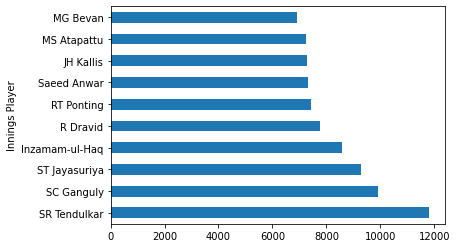

In [50]:
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending= False).head(10).plot(kind='barh')
plt.show()

In [51]:
virat_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending= False).head(10)

Innings Player
V Kohli           11247
RG Sharma         8083 
HM Amla           7745 
TM Dilshan        7296 
KC Sangakkara     7275 
AB de Villiers    7247 
LRPL Taylor       7059 
MS Dhoni          6838 
EJG Morgan        6748 
MJ Guptill        6626 
Name: Innings Runs Scored Num, dtype: int64

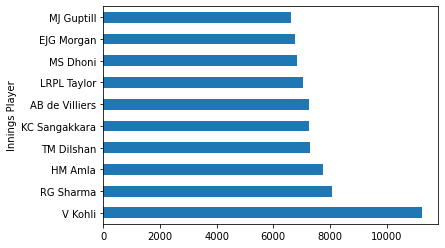

In [52]:
virat_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending= False).head(10).plot(kind='barh')
plt.show()

In [53]:
sdf.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77747,SR Tendulkar,19,19,46,1.0,0,32,3,0,59.37,1,v Bangladesh,Chattogram,2004-12-23,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
78054,SR Tendulkar,16,16,30,1.0,0,17,2,0,94.11,1,v Pakistan,Kolkata,2004-11-13,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
79590,SR Tendulkar,74,74,170,1.0,0,100,7,1,74,2,v Sri Lanka,Colombo (RPS),2004-01-08,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
79681,SR Tendulkar,18,18,30,1.0,0,21,3,0,85.71,1,v Sri Lanka,Colombo (RPS),2004-07-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [54]:
sdf.groupby(['year'])['Innings Runs Scored Num'].sum()

year
1994    1089
1995    444 
1996    1611
1997    1011
1998    1894
1999    843 
2000    1328
2001    904 
2002    741 
2003    1141
2004    812 
Name: Innings Runs Scored Num, dtype: int64

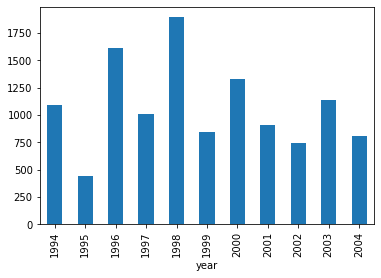

In [55]:
sdf.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind='bar')
plt.show()

In [56]:
kdf.groupby(['year'])['Innings Runs Scored Num'].sum()

year
2009    325 
2010    995 
2011    1381
2012    1026
2013    1268
2014    1054
2015    623 
2016    739 
2017    1460
2018    1202
2019    1174
Name: Innings Runs Scored Num, dtype: int64

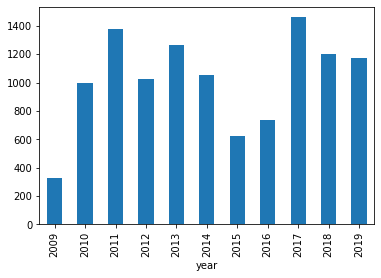

In [57]:
kdf.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind='bar')
plt.show()

# Normalization 



In [58]:
# RPI -Kohli, Sachin

sum(kdf['Innings Runs Scored Num'])/len(kdf),sum(sdf['Innings Runs Scored Num'])/len(sdf)

(50.20982142857143, 43.608856088560884)

In [59]:
sum(virat_df['Innings Runs Scored Num'])/len(virat_df)

24.99673202614379

In [60]:
non_kohli_df = virat_df[virat_df['Innings Player'] != 'V Kohli']

In [61]:
non_sachin_df = sachin_df[sachin_df['Innings Player'] != 'SR Tendulkar']

In [62]:
sum(non_kohli_df['Innings Runs Scored Num'])/len(non_kohli_df)

24.737756786500366

In [63]:
sum(non_sachin_df['Innings Runs Scored Num'])/len(non_sachin_df)

22.43512946754194

In [64]:
# If team virat_df avarage is 25 when Kohli score 50
# Average of kohli df / Average of non Kohli df
sum(kdf['Innings Runs Scored Num'])/len(kdf)/(sum(non_kohli_df['Innings Runs Scored Num'])/len(non_kohli_df))

2.029683688052565

In [65]:
# Average of Sachin df / Average of non Sachin df
sum(sdf['Innings Runs Scored Num'])/len(sdf)/(sum(non_sachin_df['Innings Runs Scored Num'])/len(non_sachin_df))

1.9437755485945407

In [66]:
# Kohli vs Other
# SR :  VK/Other  ST/other
# 100's => Number of matches to score a 100
# 50's => Number of matches to score a 50
# Teams contribution   V/others and Sachin/others

# Strikerate:

In [67]:
kdf.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
11,V Kohli,120,120,179,1.0,0,125,14,1,96,1,v West Indies,Port of Spain,2019-11-08,India,0.0,1.0,100-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [83]:
# Kohli's strikerate
kohli_str = 100*sum(kdf['Innings Runs Scored Num'])/sum(kdf['Innings Balls Faced'])

In [86]:
# strikerate of kohli's peers, i.e non-kohli
non_kohli_str = 100*sum(non_kohli_df['Innings Runs Scored Num'])/sum(non_kohli_df['Innings Balls Faced'])

In [87]:
# Sachin's SR
sachin_str = 100*sum(sdf['Innings Runs Scored Num'])/sum(sdf['Innings Balls Faced'])

In [90]:
# SR of Sachin's peers. i.e non-sachin players
non_sachin_str = 100*sum(non_sachin_df['Innings Runs Scored Num'])/sum(non_sachin_df['Innings Balls Faced'])

In [91]:
# normalize sachin's value
sachin_str/non_sachin_str

1.2194651528391862

In [92]:
# normalize kohli's value
kohli_str/non_kohli_str

1.121468839996732

# 100's: Number of matches to score a 100:

In [97]:
# sachin matches per 100's
sachin_hund = len(sdf)/sum(sdf["100's"])

In [98]:
# sachin's peers - matches per 100's
non_sachin_hund = len(non_sachin_df)/sum(non_sachin_df["100's"])

In [100]:
# kohli matches per 100's
kohli_hund = len(kdf)/sum(kdf["100's"])

In [101]:
# kohli's peers - matches per 100's
non_kohli_hund = len(non_kohli_df)/sum(non_kohli_df["100's"])

In [102]:
# normalize sachin's value
sachin_hund/non_sachin_hund

0.15459346107595562

In [103]:
# normalize kohli's value
kohli_hund/non_kohli_hund

0.18195157740278795

# 50's: Number of matches to score a 50

In [104]:
# Sachin matches per 50's

sachin_match_fifty = len(sdf)/sum(sdf["50's"])

In [105]:
# Sachin's peers -matches per 50's
sachin_peers_matches_fifty = len(non_sachin_df)/sum(non_sachin_df["50's"])

In [106]:
# Kohli matches per 50's
kohli_matches_fifty = len(kdf)/sum(kdf["50's"])

In [107]:
# kohli's peers -matches per 50's
kohli_peer_matches_fifty = len(non_kohli_df)/sum(non_kohli_df["50's"])

In [108]:
# normalize sachin's value
sachin_match_fifty/sachin_peers_matches_fifty

0.5702402203539483

In [109]:
# normalize sachin's value
kohli_matches_fifty/kohli_peer_matches_fifty

0.5507828181453231

## Team Contribution: Here we are already comparing with peers, hence no need of a normalization

In [118]:
# % of team runs by sachin
(100*sum(sdf['Innings Runs Scored Num']))/(sum(non_sachin_df[non_sachin_df.Country == 'India']['Innings Runs Scored Num'])+ sum(sdf['Innings Runs Scored Num']))

16.951875493078965

In [119]:
# % of teams runs by kohli
(100*sum(kdf['Innings Runs Scored Num']))/(sum(non_kohli_df[non_kohli_df.Country == 'India']['Innings Runs Scored Num'])+ sum(kdf['Innings Runs Scored Num']))

17.610033350556627